In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
# Permet de retirer les warning message du a l'import des fichier excel.xlsx
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# permet d'afficher toute les colonne d'un head
# pd.set_option('max_columns', None)

# permet d'afficher toute les ligne d'un head
# pd.set_option('max_rows', None)

# Reset de l'affichage des colonnes et ligne
# pd.reset_option('max_columns')
# pd.reset_option('max_rows')

# Je défini ma fonction pour check les doublons que je vais utiliser plus loin
def doublon(data):
    print(data.duplicated().sum(),'doublons et', (~data.duplicated()).sum(),'unique')

# **Fichier ERP**

In [3]:
df_erp = pd.read_excel("data\erp.xlsx")
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [8]:
price_med = df_erp['price'].median()
price_mean = df_erp['price'].mean()
print(f'la mediane du prix: {price_med} \nLe moyenne du prix : {price_mean}')

la mediane du prix: 24.4 
Le moyenne du prix : 32.41563636363637


# **Infos**
Ici je suis a la recherche d'informations a propos de mes colonnes\ligne et de leur types, nombre, etc.

In [9]:
# Je demande via .shape le nombre de ligne et de colonne
df_erp.shape # (825, 5)

(825, 5)

In [10]:
# un for sur tout les colonne avec un unique et sum pour voir les differente valeur dans mes ligne
for uni in df_erp:
    print(df_erp[uni].unique().sum(),end=' \n')

4259143 
1 
15018.399999999998 
11457 
outofstockinstock 


In [11]:
# J'utilise .unique pour voir combien de valeur sont dans ma colonne
df_erp['stock_status'].unique()

array(['outofstock', 'instock'], dtype=object)

In [12]:
# J'utilise descibre pour voir l'ensemble de ma df et analysé par exemple le count pour chacune de mes colonne et check aussi les chiffres
df_erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [13]:
# Je regarde les type et les null
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


# **Doublons**
Ici je cherche les doublons je check les valeurs des doublons et je décide si il faut garder ou non(avec bien sur l'accord du client ;D)

In [14]:
# J'utilise la fonction duplicated avec un sum sur la colonne product_id pour afficher le nombre total de id dupliquer
doublon(df_erp['product_id']) # la function que j'ai créer ce trouve au tout en haut de la feuille

0 doublons et 825 unique


In [15]:
# Je peux aussi utiliser values_counts
df_erp['product_id'].value_counts()

3847    1
5610    1
5564    1
5565    1
5566    1
       ..
4635    1
4636    1
4646    1
4647    1
7338    1
Name: product_id, Length: 825, dtype: int64

# **Valeur null ou manquante**
Ici je check les valeur null

In [16]:
# Je regarde si j'ai des valeurs manquante standar dans mes colonne
df_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [17]:
df_erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

# **Fichier Web**

In [18]:
df_web = pd.read_excel("data\web.xlsx")
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


# **Infos**

In [19]:
df_web.shape

(1513, 28)

In [20]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [21]:
# df_web = df_web.drop(['tax_class', 'post_content', 'post_password', 'post_content_filtered'], axis=1)
df_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [22]:
# Au vue des réponse demandé je n'ai pas a modifié les null autre que sku
df_web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [23]:
# ici je vois 2 ligne avec des info
df_web_null = df_web.loc[df_web['sku'].isnull(),:]
df_web_null.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Je cherche le post title pour voir si il est possible de retrouver l'id_sku
df_web.loc[df_web['post_title'] == 'Pierre Jean Villa Condrieu Jardin Suspendu 2018']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [25]:
# filtre sur la colonne tax
df_check_t = df_web_null.loc[df_web_null['tax_status'] == 'taxable']
df_check_t.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [26]:
# je drop tout les NaN filtré sur sku
df_web.dropna(subset=['sku'], inplace=True)
df_web.isnull().sum()

sku                         0
virtual                     0
downloadable                0
rating_count                0
average_rating              0
total_sales                 0
tax_status                714
tax_class                1428
post_author                 0
post_date                   0
post_date_gmt               0
post_content             1428
post_title                  0
post_excerpt              714
post_status                 0
comment_status              0
ping_status                 0
post_password            1428
post_name                   0
post_modified               0
post_modified_gmt           0
post_content_filtered    1428
post_parent                 0
guid                        0
menu_order                  0
post_type                   0
post_mime_type            714
comment_count               0
dtype: int64

In [27]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


# <a href="">**Doublons**</a>

In [28]:
# Je cherche les doublons avec plusieur colonne en parametre
df_web.loc[df_web[['sku', 'total_sales', 'post_date']].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [29]:
# Je crée un for a la recherche des doublons et je les stock dans ma variable doublons pour les print
doublons=[]
for i in df_web['sku']:
    if i not in doublons:
        doublons.append(i)
    else:
        print(i,end=' ')

print('\nTotal :',len(doublons))

15298 15296 15300 19814 19815 15303 14975 16042 14980 16041 15269 14977 16044 16043 16449 16045 16030 13127 19816 16029 16039 16318 16275 16498 16320 16319 15966 15022 15967 15490 16416 11862 15444 15953 12045 13074 15941 16069 13072 15440 13435 13078 13117 16296 16014 16462 16013 16180 15676 16120 15564 15675 15378 15813 13416 14905 15767 16505 15683 16504 15787 14800 15353 15382 15339 11668 13209 15341 13217 304 11641 1662 1360 15648 1364 7086 1366 15140 16238 16237 15141 14944 14941 14751 16093 15668 15373 15375 14474 15482 13453 15075 16124 15785 15784 15786 14332 16210 16211 16209 15629 15583 16160 16166 15783 16560 15747 15746 16190 16189 16265 16191 16263 15605 16529 15441 13032 16256 16322 16295 15656 15655 15415 15414 15413 16023 16024 15720 15714 15717 15718 15480 15213 15672 12599 15758 15829 15759 16585 15306 16497 15261 12657 15403 15461 16269 13905 16567 15436 14725 15310 15770 16097 15428 15033 16317 15032 6616 12203 14253 12476 14485 14945 15662 15663 15664 15665 15136 

In [30]:
# Je check un doublons et je constate que post_type a 2 valeur differente sur mon doublon
df_web.loc[df_web['sku'] == '13127-1']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [31]:
# Je regarde les valeur dans ma coloone post_type
df_web['post_type'].unique()

array(['product', 'attachment'], dtype=object)

In [32]:
# Je filtre sur attachment pour etre sur que les doublons n'ont que les images en plus
df_web.loc[(df_web['post_type'] == 'attachment')]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [33]:
# J'utilise ma function créer tout en haut de la feuille pour etre sur de mes resultat avant le drop
doublon(df_web[['sku','total_sales','post_date']])

714 doublons et 714 unique


In [34]:
# Je crée une nouvelle df ou je drop mes doublons
df_web_unique = df_web.drop_duplicates(subset=['sku', 'total_sales', 'post_date'])

In [35]:
df_web_unique.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [36]:
# Une fois le drop fait je check si j'ai toujour des doublons en choissisant une ligne
df_web_unique.loc[df_web_unique['sku'] == '13127-1']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [37]:
# Je check si j'ai toujours des doublons
doublon(df_web_unique)

0 doublons et 714 unique


# **Fichier Liaison**

In [38]:
df_link = pd.read_excel("data\liaison.xlsx")
# Je rename la colonne id_web en sku
df_link.rename(columns={'id_web': 'sku'},inplace=True)
df_link.head(25)

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
5,4040,15303
6,4041,14975
7,4042,16042
8,4043,14980
9,4045,16041


In [39]:
df_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [40]:
df_link.isna().sum()

product_id     0
sku           91
dtype: int64

In [41]:
# Je check si doublons via mes 2 colonne
doublon(df_link[['product_id', 'sku']])

0 doublons et 825 unique


In [42]:
# Je check avant le drop
df_link.shape

(825, 2)

In [43]:
# Je veux etre sur que ma df contienne aucun doublons
df_link_unique = df_link.drop_duplicates(subset=['product_id', 'sku'])

In [44]:
# Et je check aprés le drop
df_link_unique.shape

(825, 2)

In [45]:
df_link_unique.describe()

,product_id
count,825.000000
mean,5162.597576
std,902.644635
min,3847.000000
25%,4348.000000
50%,4907.000000
75%,5805.000000
max,7338.000000


# **Merge link web erp**

In [46]:
# Ici je merge mon fichier web et mon fichier liaison
df_link_web = pd.merge(df_link_unique,df_web_unique, on=['sku'], how='left')
df_link_web.head()

,product_id,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,15300,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,19814,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,19815,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [47]:
# petit check de null
df_link_web.isna().sum()

product_id                 0
sku                       91
virtual                  111
downloadable             111
rating_count             111
average_rating           111
total_sales              111
tax_status               111
tax_class                825
post_author              111
post_date                111
post_date_gmt            111
post_content             825
post_title               111
post_excerpt             111
post_status              111
comment_status           111
ping_status              111
post_password            825
post_name                111
post_modified            111
post_modified_gmt        111
post_content_filtered    825
post_parent              111
guid                     111
menu_order               111
post_type                111
post_mime_type           825
comment_count            111
dtype: int64

In [48]:
# Petit check de doublons
doublon(df_link_web[['product_id', 'sku', 'post_date', 'post_title']])

0 doublons et 825 unique


In [49]:
# Ici je merge la df erp avec le df liaison_web
df_web_erp = pd.merge(df_erp, df_link_web, on=['product_id'], how='outer')
df_web_erp.head(825)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,7204,0,45.0,9,instock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
823,7329,0,26.5,14,instock,14680-1,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_web_erp.shape

(825, 33)

In [51]:
# Je check les null et je vois 91 null sur sku
df_web_erp.isna().sum()

product_id                 0
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
sku                       91
virtual                  111
downloadable             111
rating_count             111
average_rating           111
total_sales              111
tax_status               111
tax_class                825
post_author              111
post_date                111
post_date_gmt            111
post_content             825
post_title               111
post_excerpt             111
post_status              111
comment_status           111
ping_status              111
post_password            825
post_name                111
post_modified            111
post_modified_gmt        111
post_content_filtered    825
post_parent              111
guid                     111
menu_order               111
post_type                111
post_mime_type           825
comment_count            111
dtype: int64

In [52]:
# Du coup je filtre sur sku pour check si je peux relier c'est données a un sku(spoiler alert "je peux pas")
df_web_erp.loc[df_web_erp['sku'].isnull()]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,7196,0,31.0,55,instock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818,7200,0,31.0,6,instock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819,7201,0,31.0,18,instock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,7203,0,45.0,30,instock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Calcul CA**

In [76]:
# Je calcul le Chiffre d'affaire prix * total des ventes
df_web_erp['CA'] = df_web_erp['price'] * df_web_erp['total_sales']
df_web_erp[['product_id','sku','post_title','CA']].head()

,product_id,sku,post_title,CA
0,3847,15298,Pierre Jean Villa Saint-Joseph Préface 2018,145.2
1,3849,15296,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0
2,3850,15300,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0
3,4032,19814,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,42.3
4,4039,19815,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0


In [54]:
# Je Filtre sur les vente en ligne uniquement
df_only_online = df_web_erp.loc[df_web_erp['onsale_web'] == 1]
# Cette df est la pour le camembert plus bas
df_only_offline = df_web_erp.loc[df_web_erp['onsale_web'] == 0]
print('offline',df_only_offline.shape)
print('online',df_only_online.shape)

offline (108, 34)
online (717, 34)


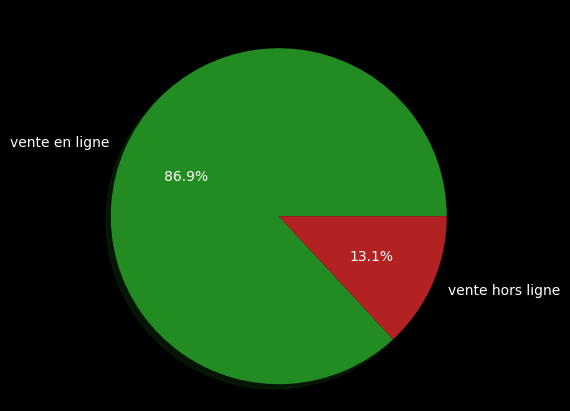

In [55]:
# Je crée un camemebert pour afficher le % des vente
labels = 'vente en ligne', 'vente hors ligne'
sizes = [len(df_only_online), len(df_only_offline)]
colors = ['forestgreen', 'firebrick']
plt.style.use("dark_background")
plt.title(' ')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.show()

In [56]:
# Ici je calcul le chiffre d'affaire en ligne, prix en ligne * total ventes
df_result_online = df_only_online['price'] * df_web_erp['total_sales']
print(f"Chiffre d'affaire en ligne : {df_result_online.sum()}$")

Chiffre d'affaire en ligne : 70568.6$


In [57]:
# Je fait la moyenne du prix pour mon Zscore plus bas
df_moyenne = df_web_erp['price'].mean()
print(df_moyenne)

32.41563636363637


In [58]:
#  Je fait l'écart type grace a numpy.std() pour mon Zscore plus bas
df_ecrat_type = np.std(df_web_erp['price'])
print(df_ecrat_type)

26.779604366935423


In [59]:
# Je fait la variance c'était dans le cours mais je ne l'ai pas utilisé
df_ecrat_type2 = df_web_erp['price']
print(df_ecrat_type2.var(ddof=0))

717.1472100495868


In [60]:
# Ici je crée une colonne score qui viens du calcul pour le Zscore
df_web_erp['Score'] = (df_web_erp['price'] - df_moyenne) / df_ecrat_type

In [61]:
df_web_erp[['price','Score']] .head()

,price,Score
0,24.2,-0.306787
1,34.3,0.070366
2,20.8,-0.433749
3,14.1,-0.683940
4,46.0,0.507265


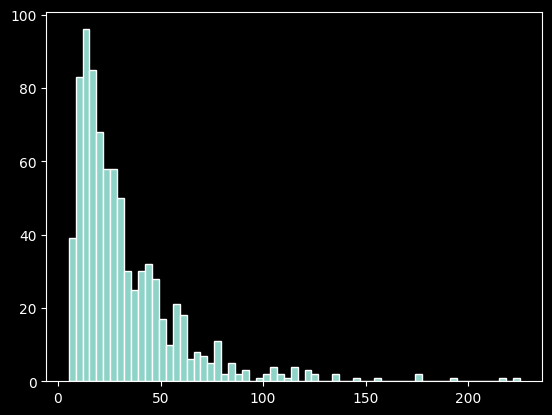

In [62]:
# Spread de ma colonne price
fig, ax = plt.subplots()
ax.hist(df_web_erp['price'], bins=65, linewidth=1, edgecolor="white")
plt.show()

In [63]:
# Je check ma colonne score
df_web_erp['Score'].describe()

count    8.250000e+02
mean    -1.033517e-16
std      1.000607e+00
min     -1.016282e+00
25%     -6.652688e-01
50%     -2.993187e-01
75%      3.578979e-01
max      7.191457e+00
Name: Score, dtype: float64

In [64]:
df_web_erp[['Score','price']].head()

,Score,price
0,-0.306787,24.2
1,0.070366,34.3
2,-0.433749,20.8
3,-0.683940,14.1
4,0.507265,46.0


# **Z-score**
Ici je cherche le Z-score qui va me permettre de faire ressortir les outliers

In [65]:
# Je def une fonction pour déviation 2
def score2(data):
    score = [] # Crée une var ou je vais stock mes resultats
    valu = 2 # déviation 2
    for scor in data: # Pour chaque score dans mon data
        if scor > valu: # Si mon score est plus grand
            score.append(scor) # Je le rajoute a ma var
    return score # Je retourne ma variable avec mes score a l'interieur

# Je def une fonction pour déviation 3
def score3(data):
    score = [] # Crée une var ou je vais stock mes resultats
    valu = 3 # déviation 3
    for scor in data: # Pour chaque score dans mon data
        if scor > valu: # Si mon score est plus grand
            score.append(scor) # Je le rajoute a ma var
    return score # Je retourne ma variable avec mes score a l'interieur

print('Résultat total : "',len(score3(df_web_erp['Score'])),'"\nScore 3 : ',score3(df_web_erp['Score']),'\n')
print('Résultat total : "',len(score2(df_web_erp['Score'])), '"\nScore 2 : ', score2(df_web_erp['Score']),'\n')

Résultat total : " 18 "
Score 3 :  [7.191456639820493, 3.5132843020089157, 5.361705933701028, 4.652210761940419, 4.166766697051582, 3.9053737390345153, 6.9113927562307795, 3.4498031550619137, 5.324364082555733, 5.933036256224046, 3.3452459718550873, 3.0465111626927257, 3.830690036743925, 3.1361316054414345, 3.083853013838021, 3.307904120709792, 3.083853013838021, 3.307904120709792] 

Résultat total : " 34 "
Score 2 :  [2.004673515738989, 2.523725246658593, 2.090559773373169, 7.191456639820493, 3.5132843020089157, 5.361705933701028, 2.841130981393602, 4.652210761940419, 2.6730926512397737, 2.8822070176534265, 4.166766697051582, 2.6096115042927717, 3.9053737390345153, 6.9113927562307795, 2.710434502385069, 2.710434502385069, 2.9718274604021353, 2.030812811540696, 2.2249904374962313, 3.4498031550619137, 5.324364082555733, 5.933036256224046, 2.2623322886415265, 3.3452459718550873, 3.0465111626927257, 3.830690036743925, 2.7328396130722457, 3.1361316054414345, 3.083853013838021, 3.3079041207

In [66]:
# Je crée une variable en utilisant la fonction avec la déviation 2
price_score_2 = pd.DataFrame(columns=['Score'])
price_score_2['Score'] = score2(df_web_erp['Score'])
# Je crée un merge avec df_web_erp pour récup le prix et les id
result_score_2 = pd.merge(price_score_2, df_web_erp, on=['Score'], how='left')
# Le resultat different avec les resultat plus haut car un produit/id  peut avoir un prix/score identique a un autre.
print(result_score_2.shape)
print(f'{result_score_2[["Score","price","sku","product_id"]].sort_values(by="Score", ascending=False)}')

(42, 35)
       Score  price    sku  product_id
3   7.191457  225.0  15940        4352
13  6.911393  217.5  14581        5001
24  5.933036  191.3  14983        5892
5   5.361706  176.0   3510        4402
23  5.324364  175.0  15185        5767
7   4.652211  157.0   7819        4406
10  4.166767  144.0    NaN        4594
12  3.905374  137.0  14220        4904
28  3.830690  135.0  14923        6126
4   3.513284  126.5  12589        4355
22  3.449803  124.8  14915        5612
26  3.345246  122.0  14775        5917
34  3.307904  121.0  15070        6216
33  3.307904  121.0  15072        6213
38  3.307904  121.0  15072        6213
39  3.307904  121.0  15070        6216
30  3.136132  116.4  15126        6202
37  3.083853  115.0  12790        6215
31  3.083853  115.0  13996        6212
32  3.083853  115.0  12790        6215
36  3.083853  115.0  13996        6212
27  3.046511  114.0  14773        5918
18  2.971827  112.0  13914        5025
9   2.882207  109.6  12857        4582
6   2.841131  10

In [67]:
# Je crée une variable en utilisant la fonction avec la déviation 2
price_score_3 = pd.DataFrame(columns=['Score'])
price_score_3['Score'] = score3(df_web_erp['Score'])
# Je crée un merge avec df_web_erp pour récup le prix et les id
result_score_3 = pd.merge(price_score_3, df_web_erp, on=['Score'], how='left')
# Le resultat different avec les resultat plus haut car un produit/id  peut avoir un prix/score identique a un autre.
print(result_score_3.shape)
print(f'{result_score_3[["Score","price","sku","product_id"]].sort_values(by="Score", ascending=False)}')

(22, 35)
       Score  price    sku  product_id
0   7.191457  225.0  15940        4352
6   6.911393  217.5  14581        5001
9   5.933036  191.3  14983        5892
2   5.361706  176.0   3510        4402
8   5.324364  175.0  15185        5767
3   4.652211  157.0   7819        4406
4   4.166767  144.0    NaN        4594
5   3.905374  137.0  14220        4904
12  3.830690  135.0  14923        6126
1   3.513284  126.5  12589        4355
7   3.449803  124.8  14915        5612
10  3.345246  122.0  14775        5917
16  3.307904  121.0  15072        6213
20  3.307904  121.0  15072        6213
17  3.307904  121.0  15070        6216
21  3.307904  121.0  15070        6216
13  3.136132  116.4  15126        6202
15  3.083853  115.0  12790        6215
14  3.083853  115.0  13996        6212
18  3.083853  115.0  13996        6212
19  3.083853  115.0  12790        6215
11  3.046511  114.0  14773        5918


In [68]:
def scoremoins3(data):
    score = [] # Crée une var ou je vais stock mes resultats
    valu = 3 # déviation 3
    for scor in data: # Pour chaque score dans mon data
        if scor < valu: # Si mon score est plus petit
            score.append(scor) # Je le rajoute a ma var
    return score # Je retourne ma variable avec mes score a l'interieur

# Je crée une variable en utilisant la fonction avec le score < 3
prix_normaux = pd.DataFrame(columns=['Score'])
prix_normaux['Score'] = scoremoins3(df_web_erp['Score'])
# Je crée un merge avec df_web_erp pour récup le prix et les id
result_prix = pd.merge(prix_normaux, df_web_erp, on=['Score'], how='left')
# Le resultat different avec les resultat plus haut car un produit/id  peut avoir un prix/score identique a un autre.
# print(result_prix.shape)
# print(f'{result_prix[["Score","price","sku","product_id"]].sort_values(by="Score", ascending=False)}')

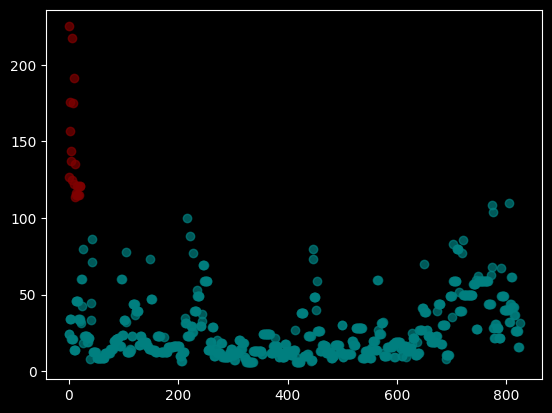

In [69]:
# Je rajoute mes colonne price_value3 et prix_normaux dans mon df
df_web_erp['price_value3'] = result_score_3['price']
df_web_erp['prix_normaux'] = result_prix['price']
plt.scatter(df_web_erp['price_value3'].index,df_web_erp['price_value3'], c='maroon', alpha=0.7)
plt.scatter(df_web_erp['prix_normaux'].index,df_web_erp['prix_normaux'], c='teal', alpha=0.7)
plt.show()

# **Écart interquartile**
Je n'ai pas utiliser cela mais vu que c'était dans le cours je voulais voir ce que ca donner
<a href="https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/"> Lien du code ci dessous <a/>

In [70]:
q25, q75 = np.percentile(df_web_erp['Score'], 25), np.percentile(df_web_erp['Score'], 75)
iqr = q75 - q25

In [71]:
cut_offs = iqr * 1.5
lowers, uppers = q25 - cut_offs, q75 + cut_offs

In [72]:
outlierz = [x for x in df_web_erp['Score'] if x < lowers or x > uppers]
print('Identified outliers: %d' % len(outlierz))

Identified outliers: 37


In [73]:
print(outlierz)

[2.004673515738989, 2.523725246658593, 2.090559773373169, 7.191456639820493, 3.5132843020089157, 1.9860025901663418, 5.361705933701028, 2.841130981393602, 4.652210761940419, 2.6730926512397737, 2.8822070176534265, 4.166766697051582, 2.6096115042927717, 3.9053737390345153, 6.9113927562307795, 2.710434502385069, 2.710434502385069, 2.9718274604021353, 2.030812811540696, 1.9523949241355765, 2.2249904374962313, 1.9150530729902813, 3.4498031550619137, 5.324364082555733, 5.933036256224046, 2.2623322886415265, 3.3452459718550873, 3.0465111626927257, 3.830690036743925, 2.7328396130722457, 3.1361316054414345, 3.083853013838021, 3.307904120709792, 2.4863833955132977, 3.083853013838021, 3.307904120709792, 2.2249904374962313]


In [74]:
outlierz_removed = [x for x in df_web_erp['Score'] if x >= lowers and x <= uppers]
print('Non-outlier observations: %d' % len(outlierz_removed))

Non-outlier observations: 788


In [75]:
df_web_erp['Score'].kurtosis()

10.615358266001195